<a href="https://colab.research.google.com/github/Aldistwn29/Data_analysis/blob/main/Segmentasi_Nasabah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statment**

Belum memiliki strategi yang tepat untuk menawarkan jenis produk yg sesuai dengan segmen calon nasabah yg di rekrut.

# **Objektive**

Membuat model clustering untuk mengetahui kepemilikian produk berdasarkan demografi nasabah yang menggunakan FundFusion. Dengan Menggunakan Silhouette Score > 0.7.

# **Variabel yang tersedia**

Dari dataset yang dimiliki terdapat beberapa data yang tersedia:


---
**1. GCIF                     :** Unique Identifier Nasabah\
**2. Area                     :** Lokasi Nasabah (Jakarta,Bogor,Bandung,Surabaya,Jogja,Solo)\
**3. Jalur_Pembukaan          :** Touch Points Nasabah membuka produk --> Cabang, Telemarketing, Aplikasi Digital, Internet Banking\
**4. Vintage                  :** Durasi Menjadi Nasabah (Sejak membuka akun)\
**5. Usia                     :** Usia Nasabah\
**6. Jenis_Kelamin            :** Laki-laki (1) & Perempuan (0)\
**7. Status_Perkawinan        :** Belum Menikah (0), Menikah (1), Cerai (2), Janda/Duda (3)\
**8. Jumlah_Anak              :** Jumlah Anak Nasabah (numerik)\
**9. Pendidikan               :** Status Pendidikan Terakhir --> Tidak Memiliki Pendidikan Formal (0), SD (1), SMP (2), SMA (3), Sarjana (4), Magister (5), Doktor (6)\
**10. Produk_Tabungan         :** Status Kepemilikan Produk (Yes/1, No/0)\
**11. Produk_Deposito         :** Status Kepemilikan Produk (Yes/1, No/0)\
**12. Produk_Kartu_Kredit     :** Status Kepemilikan Produk (Yes/1, No/0)\
**13. Produk_Kredit_Rumah     :** Status Kepemilikan Produk (Yes/1, No/0)\
**14. Produk_Kredit_Kendaraan :** Status Kepemilikan Produk (Yes/1, No/0)\
**15. Produk_Kredit_Dana_Tunai:** Status Kepemilikan Produk (Yes/1, No/0)\
**16. Total_Kepemilikan_Produk:** Jumlah Produk Yang Dimiliki (Penjumlahan dari Produk2)\
**17. Pendapatan_Tahunan      :** Rata-rata Pendapatan Dalam Setahun\
**18. Total_Relationship_Balance :** Total Asset Nasabah dalam Cutoff Bulan Observasi.

# **Import Package**

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

In [142]:
pd.set_option('display.max_columns', None)

# **Data For Clustering**

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
path_1 = '/content/drive/MyDrive/Dataset/ProjekClustering/clustering_data.csv'

In [145]:
data = pd.read_csv(path_1)
data.tail()

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
28124,G14522,Solo,Cabang,2 - 3 Tahun,47.0,Perempuan,Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,1,6,364,600734753
28125,G15052,Bandung,Telemarketing,2 - 3 Tahun,38.0,Perempuan,Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,1,6,350,764670896
28126,G06299,Jogja,Internet Banking,2 - 3 Tahun,58.0,Laki-laki,Cerai,4,Tidak Sekolah Formal,1,1,1,1,1,1,6,365,629634394
28127,G17962,Jakarta,Telemarketing,2 - 3 Tahun,NaN,Perempuan,Janda/Duda,1,Tidak Sekolah Formal,1,1,1,1,1,1,6,225,423564729
28128,G21730,Jogja,Cabang,2 - 3 Tahun,NaN,Laki-laki,Janda/Duda,0,Tidak Sekolah Formal,1,1,1,1,1,1,6,187,154914927


In [146]:
data.dtypes

,0
GCIF,object
Area,object
Jalur_Pembukaan,object
Vintage,object
Usia,float64
Jenis_Kelamin,object
Status_Perkawinan,object
Jumlah_Anak,int64
Pendidikan,object
Produk_Tabungan,int64


# **Data Understanding**

In [147]:
data.groupby(('Area'))['Area'].count()

,Area
Area,
Bandung,6917
Bogor,1191
Jakarta,7017
Jogja,3001
Solo,5001
Surabaya,5002


In [148]:
data.groupby(('Area')).mean(numeric_only=True)

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Area,,,,,,,,,,,
Bandung,42.562310,1.296516,0.925401,0.599682,0.329767,0.587393,0.163076,0.537516,3.142836,405.124910,2.454722e+08
Bogor,42.660451,1.366919,0.921075,0.596977,0.324097,0.582704,0.160369,0.554996,3.140218,402.227540,2.499853e+08
Jakarta,42.696995,1.322930,0.925467,0.603534,0.336184,0.590708,0.169873,0.540829,3.166595,406.478552,2.485876e+08
Jogja,42.512422,1.309897,0.934355,0.608464,0.333555,0.594469,0.158614,0.535155,3.164612,402.694768,2.496616e+08
Solo,42.445452,1.270746,0.922416,0.603479,0.337932,0.604679,0.156969,0.540492,3.165967,408.010198,2.507478e+08
Surabaya,42.768980,1.284486,0.927629,0.608357,0.329668,0.585566,0.168533,0.528589,3.148341,409.074370,2.523277e+08


In [149]:
data.groupby(('Vintage'))['Vintage'].count()

,Vintage
Vintage,
2 - 3 Tahun,13953
< 1 Tahun,9278
> 4 Tahun,4898


In [150]:
data.groupby(('Vintage')).mean(numeric_only=True)

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Vintage,,,,,,,,,,,
2 - 3 Tahun,42.578850,1.291694,0.927256,0.607755,0.328531,0.589336,0.163764,0.539311,3.155952,407.679639,2.489367e+08
< 1 Tahun,42.689341,1.294676,0.931235,0.592585,0.336495,0.594201,0.164798,0.523389,3.142703,395.611231,2.486679e+08
> 4 Tahun,42.571866,1.338301,0.912822,0.613107,0.338914,0.592691,0.163536,0.560637,3.181707,422.593508,2.500646e+08


In [151]:
data.groupby(('Status_Perkawinan'))['Status_Perkawinan'].count()

,Status_Perkawinan
Status_Perkawinan,
Belum Menikah,8168
Cerai,4077
Janda/Duda,4045
Menikah,11839


In [152]:
data.groupby(('Status_Perkawinan')).mean(numeric_only=True)

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Status_Perkawinan,,,,,,,,,,,
Belum Menikah,39.571621,0.000000,1.000000,0.596107,0.333374,0.331660,0.160749,0.499633,2.921523,420.636141,2.423448e+08
Cerai,50.226883,2.003679,1.000000,0.607555,0.337258,0.509688,0.172676,0.389747,3.016924,426.269070,2.393499e+08
Janda/Duda,NaN,1.201978,1.000000,0.609889,0.337948,0.597281,0.161187,0.401731,3.108035,289.648208,2.474754e+08
Menikah,42.084467,1.989948,0.824309,0.605457,0.329504,0.797027,0.164372,0.661542,3.382211,429.378833,2.575412e+08


In [153]:
data.groupby(('Jalur_Pembukaan'))['Jalur_Pembukaan'].count()

,Jalur_Pembukaan
Jalur_Pembukaan,
Aplikasi Digital,6216
Cabang,5856
Internet Banking,5795
Telemarketing,10262


In [154]:
data.groupby(('Jalur_Pembukaan')).mean(numeric_only=True)

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Jalur_Pembukaan,,,,,,,,,,,
Aplikasi Digital,42.442089,1.292149,0.930180,0.598456,0.323681,0.593147,0.165541,0.535714,3.146718,405.278314,2.489950e+08
Cabang,42.560627,1.308743,0.924180,0.610143,0.325478,0.583675,0.153518,0.544740,3.141735,409.923156,2.456661e+08
Internet Banking,42.723992,1.302502,0.928387,0.597929,0.347368,0.598965,0.169802,0.531493,3.173943,406.593270,2.517532e+08
Telemarketing,42.676514,1.300526,0.923309,0.606412,0.334730,0.590821,0.165952,0.538589,3.159813,404.674527,2.494725e+08


In [155]:
data.groupby(('Pendidikan'))['Pendidikan'].count()

,Pendidikan
Pendidikan,
Doktor,2605
Magister,2468
SD,5229
SMA,5085
SMP,2538
Sarjana,7691
Tidak Sekolah Formal,2513


In [156]:
data.groupby(('Pendidikan')).mean(numeric_only=True)

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Pendidikan,,,,,,,,,,,
Doktor,41.941468,1.280998,0.929750,0.593474,0.345489,0.602303,0.174280,0.534741,3.180038,401.396545,2.461291e+08
Magister,42.659112,1.286467,0.927472,0.605754,0.352917,0.592788,0.156807,0.558752,3.194489,402.770665,2.518470e+08
SD,42.842732,1.272901,0.924651,0.603748,0.335437,0.585389,0.165232,0.538918,3.153375,408.624402,2.487423e+08
SMA,42.808137,1.304621,0.922517,0.609833,0.332350,0.589971,0.161652,0.523304,3.139626,403.406096,2.513348e+08
SMP,42.837314,1.352640,0.923956,0.597715,0.325453,0.602837,0.160757,0.544917,3.155634,410.273050,2.478497e+08
Sarjana,42.458725,1.313223,0.929138,0.604993,0.325055,0.589780,0.167078,0.538812,3.154856,408.991549,2.500305e+08
Tidak Sekolah Formal,42.607689,1.295265,0.923597,0.601671,0.328293,0.588938,0.157183,0.536809,3.136490,403.572622,2.434971e+08


# **Data Preparation**

# **Pengecekan Data Missing value dan Duplicate**d

In [157]:
data.isnull().sum()

,0
GCIF,0
Area,0
Jalur_Pembukaan,0
Vintage,0
Usia,4045
Jenis_Kelamin,0
Status_Perkawinan,0
Jumlah_Anak,0
Pendidikan,0
Produk_Tabungan,0


In [158]:
data = data.dropna()

In [159]:
# Data setelah di hapus missing value/nilai yg kosong
data.isnull().sum()

,0
GCIF,0
Area,0
Jalur_Pembukaan,0
Vintage,0
Usia,0
Jenis_Kelamin,0
Status_Perkawinan,0
Jumlah_Anak,0
Pendidikan,0
Produk_Tabungan,0


In [160]:
# Mengecek nilai duplikat
data.duplicated().sum()

0

# **Pengecekan data outlier**

In [161]:
data.count()

,0
GCIF,24084
Area,24084
Jalur_Pembukaan,24084
Vintage,24084
Usia,24084
Jenis_Kelamin,24084
Status_Perkawinan,24084
Jumlah_Anak,24084
Pendidikan,24084
Produk_Tabungan,24084


In [162]:
# Mendeteksi dan mengatasi outlier
from scipy import stats
z_score = stats.zscore(data[['Usia', 'Pendapatan_Tahunan', 'Total_Relationship_Balance']])
data = data[(z_score < 3).all(axis=1)] # Menghapus data dengan z-score lebih dari 3

In [163]:
data.count()

,0
GCIF,23704
Area,23704
Jalur_Pembukaan,23704
Vintage,23704
Usia,23704
Jenis_Kelamin,23704
Status_Perkawinan,23704
Jumlah_Anak,23704
Pendidikan,23704
Produk_Tabungan,23704


# Filter Data Telemarketing Only

In [164]:
data0 = data[data['Jalur_Pembukaan'] == 'Telemarketing']

In [165]:
data0

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
7,G13193,Solo,Telemarketing,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
8,G09296,Jakarta,Telemarketing,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
9,G09228,Jakarta,Telemarketing,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28089,G19583,Bandung,Telemarketing,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
28090,G18081,Jakarta,Telemarketing,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
28092,G18530,Bandung,Telemarketing,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
28095,G03782,Jogja,Telemarketing,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


In [166]:
data0 = data0.drop(columns=['GCIF', 'Jalur_Pembukaan']).reset_index(drop=True)

In [167]:
data0 = data0.reset_index()

In [168]:
data0

,index,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
1,1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
2,2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
3,3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
4,4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
8649,8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
8650,8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
8651,8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


# **Pembagian dataset Experiment**

1. Experiment 0 -> Semua variabel digunakan
2. Experiment 1 -> Menggunakan variabel Demographics
3. Experiment 2 -> Menggunakan variabel Financial Related Variabel

In [169]:
data1 = data0.iloc[:,1:8]

In [170]:
data1

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan
0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor
1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor
2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor
3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor
4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor
...,...,...,...,...,...,...,...
8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal
8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal
8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal
8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal


In [171]:
data2 = data0.iloc[:,8:17]

In [172]:
data2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,198,10668586
1,1,0,0,0,0,0,1,280,299076075
2,1,0,0,0,0,0,1,295,76653088
3,1,0,0,0,0,0,1,443,247157199
4,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...
8648,1,1,1,1,0,1,5,489,321693904
8649,1,1,1,1,1,0,5,658,224477967
8650,1,1,1,1,0,1,5,585,411871605
8651,1,1,0,1,1,1,5,279,161744694


# **Melakukan Encoding Untuk data Categpry**

In [173]:
data1 = pd.get_dummies(data1, columns=['Area', 'Jenis_Kelamin', 'Status_Perkawinan', 'Pendidikan', 'Vintage']).astype(int)

In [174]:
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Status_Perkawinan_Menikah,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,30,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,29,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,49,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,21,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0
8649,58,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0
8650,42,3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0
8651,44,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0


# **Standarisasi Data Numeric**

In [175]:
predname_num = data2.columns
predname_num

Index(['Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit',
       'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance'],
      dtype='object')

In [176]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [177]:
X_num = pd.DataFrame(scaler.fit_transform(data2))
X_num.head()

,0,1,2,3,4,5,6,7,8
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


In [178]:
X_num.columns = predname_num
X_num.head()

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


# **Pengecekan Korelasi**

In [179]:
corrtest1 = data1.corr().abs()
corrtest2 = X_num.corr().abs()

In [180]:
corrtest1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Status_Perkawinan_Menikah,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
Usia,1.000000,0.105752,0.015472,0.010122,0.000703,0.004196,0.009153,0.000800,0.022998,0.022998,0.182525,0.269976,0.027666,0.019497,0.002532,0.017649,0.007478,0.000769,0.009315,0.023562,0.009375,0.014677,0.005059
Jumlah_Anak,0.105752,1.000000,0.004419,0.008073,0.006375,0.003399,0.000538,0.020592,0.004123,0.004123,0.637109,0.210638,0.448296,0.010529,0.012402,0.002656,0.005471,0.004266,0.001571,0.012021,0.012883,0.000549,0.015414
Area_Bandung,0.015472,0.004419,1.000000,0.075688,0.434134,0.129781,0.165969,0.173396,0.005038,0.005038,0.001969,0.004996,0.001850,0.004182,0.018846,0.009738,0.008150,0.008533,0.002294,0.003398,0.004687,0.007997,0.003280
Area_Bogor,0.010122,0.008073,0.075688,1.000000,0.160824,0.048077,0.061483,0.064234,0.017781,0.017781,0.017977,0.007205,0.011709,0.014371,0.018786,0.005275,0.019397,0.005195,0.001137,0.011784,0.006728,0.011535,0.004774
Area_Jakarta,0.000703,0.006375,0.434134,0.160824,1.000000,0.275762,0.352656,0.368437,0.016156,0.016156,0.003612,0.000622,0.002968,0.006520,0.004666,0.005406,0.001637,0.021187,0.003183,0.004680,0.000667,0.002865,0.002436
Area_Jogja,0.004196,0.003399,0.129781,0.048077,0.275762,1.000000,0.105423,0.110141,0.000914,0.000914,0.004833,0.011100,0.003675,0.001621,0.012903,0.014696,0.005862,0.002432,0.017757,0.003543,0.001066,0.001924,0.000867
Area_Solo,0.009153,0.000538,0.165969,0.061483,0.352656,0.105423,1.000000,0.140853,0.001620,0.001620,0.018026,0.001115,0.016291,0.012661,0.008184,0.002844,0.000952,0.013671,0.004444,0.016788,0.023666,0.008069,0.020266
Area_Surabaya,0.000800,0.020592,0.173396,0.064234,0.368437,0.110141,0.140853,1.000000,0.010665,0.010665,0.026844,0.018072,0.012041,0.006102,0.019120,0.014693,0.010579,0.004389,0.011413,0.008367,0.024732,0.008411,0.021204
Jenis_Kelamin_Laki-laki,0.022998,0.004123,0.005038,0.017781,0.016156,0.000914,0.001620,0.010665,1.000000,1.000000,0.008398,0.014166,0.018525,0.011471,0.003639,0.010552,0.001215,0.017649,0.010154,0.002050,0.000872,0.006728,0.006585
Jenis_Kelamin_Perempuan,0.022998,0.004123,0.005038,0.017781,0.016156,0.000914,0.001620,0.010665,1.000000,1.000000,0.008398,0.014166,0.018525,0.011471,0.003639,0.010552,0.001215,0.017649,0.010154,0.002050,0.000872,0.006728,0.006585


In [181]:
corrtest2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Produk_Tabungan,1.000000,0.014734,0.034623,0.139139,0.008027,0.077088,0.153869,0.291752,0.004527
Produk_Deposito,0.014734,1.000000,0.016782,0.006236,0.001566,0.006622,0.460055,0.004554,0.059145
Produk_Kartu_Kredit,0.034623,0.016782,1.000000,0.008642,0.021552,0.019652,0.413171,0.018990,0.079988
Produk_Kredit_Rumah,0.139139,0.006236,0.008642,1.000000,0.019383,0.057235,0.456175,0.024236,0.068262
Produk_Kredit_Kendaraan,0.008027,0.001566,0.021552,0.019383,1.000000,0.023933,0.324242,0.000427,0.094714
Produk_Kredit_Dana_Tunai,0.077088,0.006622,0.019652,0.057235,0.023933,1.000000,0.464110,0.000056,0.077747
Total_Kepemilikan_Produk,0.153869,0.460055,0.413171,0.456175,0.324242,0.464110,1.000000,0.062893,0.168432
Pendapatan_Tahunan,0.291752,0.004554,0.018990,0.024236,0.000427,0.000056,0.062893,1.000000,0.004261
Total_Relationship_Balance,0.004527,0.059145,0.079988,0.068262,0.094714,0.077747,0.168432,0.004261,1.000000


In [182]:
# Membuang nilai redundan pada matriks
upper = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(bool))
upper1 = corrtest2.where(np.triu(np.ones(corrtest2.shape), k=1).astype(bool))

# Mencari nilai yang berkorelasi di atas 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop1 = [column for column in upper1.columns if any(upper1[column] > 0.7)]

# Menghapus kolom yang berkorelasi di atas 0.7
data1 = data1.drop(to_drop, axis=1)
data2 = data2.drop(to_drop1, axis=1)

In [183]:
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0
1,30,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0
2,29,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0
3,49,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0
4,21,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
8649,58,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0
8650,42,3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0
8651,44,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0


In [184]:
X_num

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...
8648,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


# **Menggabungkan dua datframe**

In [185]:
data_combined = pd.concat([data1, X_num], axis=1, join='inner')
data_combined

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,23,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,30,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,29,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,49,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,21,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,58,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,42,3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,44,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


# **Modeling dan Evaluation**

Menggunakan 2 algorithma : \
1. **K-means** \
2. **K-Medoid** \

Dengan pengecek Sihouette score

In [186]:
# Libarry
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **Ekperiment 0**

In [187]:
for n_clustering in range(3, 6):
  kmeans = KMeans(n_clusters=n_clustering, random_state=0)
  clustering_labels = kmeans.fit_predict(data_combined)
  silhouette_avg = silhouette_score(data_combined, clustering_labels)
  print(f"Silhoutte Score (K-Means) -"+ str(n_clustering) + " : " + str(silhouette_avg))
  data0['Clustering_KMeans_Exp0_' + str(n_clustering)] = clustering_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhoutte Score (K-Means) -3 : 0.4337636155000406


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhoutte Score (K-Means) -4 : 0.41093123023700157


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhoutte Score (K-Means) -5 : 0.32999985928593295


# **Ekperiment 1**

In [188]:
for n_clustering in range(3, 6):
  kmeans = KMeans(n_clusters=n_clustering, random_state=0)
  clustering_labels = kmeans.fit_predict(data1)
  silhouette_avg = silhouette_score(data1, clustering_labels)
  print(f"Silhoutte Score (K-Means) -"+ str(n_clustering) + " : " + str(silhouette_avg))
  data0['Clustering_KMeans_Exp1_' + str(n_clustering)] = clustering_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhoutte Score (K-Means) -3 : 0.5001832110224678


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhoutte Score (K-Means) -4 : 0.4723681211881035


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhoutte Score (K-Means) -5 : 0.4166214027850611


# Eksperimen 2

In [189]:
for n_clustering in range(3, 6):
  kmeans = KMeans(n_clusters=n_clustering, random_state=0)
  clustering_labels = kmeans.fit_predict(X_num)
  silhouette_avg = silhouette_score(X_num, clustering_labels)
  print(f"Silhoutte Score (K-Means) -"+ str(n_clustering) + " : " + str(silhouette_avg))
  data0['Clustering_KMeans_Exp2_' + str(n_clustering)] = clustering_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhoutte Score (K-Means) -3 : 0.18408368480533616


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhoutte Score (K-Means) -4 : 0.1862782616840365


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhoutte Score (K-Means) -5 : 0.19917934939547233


# **K-Medoids**

In [190]:
!pip install scikit-learn-extra

In [191]:
from sklearn_extra.cluster import KMedoids

# **Eksperimen 0**

In [192]:
for n_clustering in range(3, 6):
  kmedoids = KMedoids(n_clusters=n_clustering, random_state=0)
  clustering_labels = kmedoids.fit_predict(data_combined)
  silhouette_avg = silhouette_score(data_combined, clustering_labels)
  print(f"Silhoutte Score (K-Medoids) -"+ str(n_clustering) + " : " + str(silhouette_avg))
  data0['Clustering_KMedoids_Exp0_' + str(n_clustering)] = clustering_labels

Silhoutte Score (K-Medoids) -3 : 0.43369790762336996
Silhoutte Score (K-Medoids) -4 : 0.33519427927551565
Silhoutte Score (K-Medoids) -5 : 0.3211940252247904


# **Eksperimen 1**

In [193]:
for n_clustering in range(3, 6):
  kmedoids = KMedoids(n_clusters=n_clustering, random_state=0)
  clustering_labels = kmedoids.fit_predict(data1)
  silhouette_avg = silhouette_score(data1, clustering_labels)
  print(f"Silhoutte Score (K-Medoids) -"+ str(n_clustering) + " : " + str(silhouette_avg))
  data0['Clustering_KMedoids_Exp1_' + str(n_clustering)] = clustering_labels

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhoutte Score (K-Medoids) -3 : 0.0050675633465087746


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhoutte Score (K-Medoids) -4 : 0.4657942038387023


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhoutte Score (K-Medoids) -5 : 0.4178025801646672


# **Eksperimen 2**

In [194]:
for n_clustering in range(3, 6):
  kmedoids = KMedoids(n_clusters=n_clustering, random_state=0)
  clustering_labels = kmedoids.fit_predict(X_num)
  silhouette_avg = silhouette_score(X_num, clustering_labels)
  print(f"Silhoutte Score (K-Medoids) -"+ str(n_clustering) + " : " + str(silhouette_avg))
  data0['Clustering_KMedoids_Exp2_' + str(n_clustering)] = clustering_labels

Silhoutte Score (K-Medoids) -3 : 0.11659038864364947
Silhoutte Score (K-Medoids) -4 : 0.09680611087667028
Silhoutte Score (K-Medoids) -5 : 0.08883545658405254


# **Analisa Hasil**

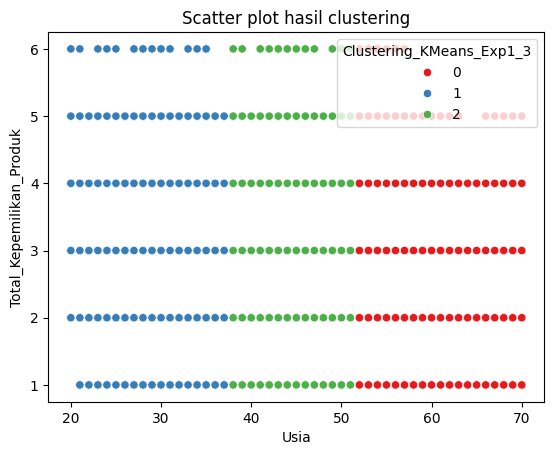

In [195]:
sns.scatterplot(data=data0, x='Usia', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3', palette='Set1')
plt.title('Scatter plot hasil clustering')
plt.show()

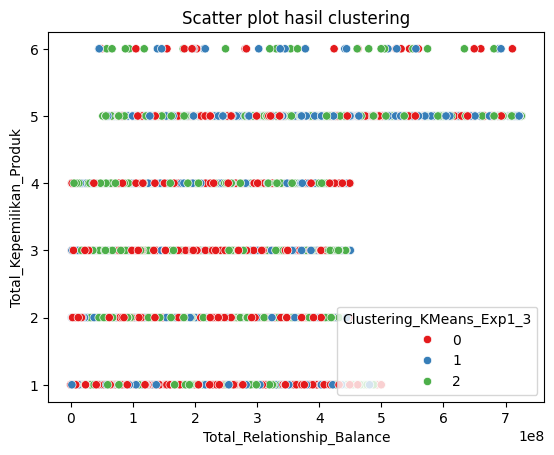

In [196]:
sns.scatterplot(data=data0, x='Total_Relationship_Balance', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3', palette='Set1')
plt.title('Scatter plot hasil clustering')
plt.show()

In [200]:
cluster_means = data0[['Usia','Jumlah_Anak','Produk_Tabungan','Produk_Deposito','Produk_Kartu_Kredit','Produk_Kredit_Rumah','Produk_Kredit_Kendaraan','Produk_Kredit_Dana_Tunai','Total_Kepemilikan_Produk','Total_Relationship_Balance','Clustering_KMeans_Exp1_3']].groupby('Clustering_KMeans_Exp1_3').mean()
print(cluster_means)
pd

                               Usia  Jumlah_Anak  Produk_Tabungan  \
Clustering_KMeans_Exp1_3                                            
0                         58.063617     1.474844         0.688565   
1                         29.503177     1.191528         1.000000   
2                         44.974856     1.295617         0.988107   

                          Produk_Deposito  Produk_Kartu_Kredit  \
Clustering_KMeans_Exp1_3                                         
0                                0.600416             0.342204   
1                                0.592436             0.308018   
2                                0.603126             0.333333   

                          Produk_Kredit_Rumah  Produk_Kredit_Kendaraan  \
Clustering_KMeans_Exp1_3                                                 
0                                    0.612474                 0.170062   
1                                    0.586989                 0.157337   
2                          

<module 'pandas' from '/usr/local/lib/python3.10/dist-packages/pandas/__init__.py'>

# **Group 0**

In [204]:
data0[data0['Clustering_KMeans_Exp1_3'] == 0][['Usia', 'Jumlah_Anak', 'Total_Kepemilikan_Produk', 'Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2405.000000,2405.000000,2405.000000,2.405000e+03
mean,58.063617,1.474844,2.955509,2.379434e+08
std,5.298230,1.478314,1.053131,1.382820e+08
min,52.000000,0.000000,1.000000,1.028000e+03
25%,54.000000,0.000000,2.000000,1.245667e+08
50%,57.000000,1.000000,3.000000,2.322131e+08
75%,61.000000,3.000000,4.000000,3.491686e+08
max,70.000000,4.000000,6.000000,7.181097e+08


In [203]:
data0[data0['Clustering_KMeans_Exp1_3'] == 0]['Area'].value_counts(normalize=True)

,proportion
Area,
Jakarta,0.482328
Bandung,0.163825
Surabaya,0.125572
Solo,0.125572
Jogja,0.074012
Bogor,0.028690


In [205]:
data0[data0['Clustering_KMeans_Exp1_3'] == 0]['Vintage'].value_counts(normalize=True)

,proportion
Vintage,
2 - 3 Tahun,0.486486
< 1 Tahun,0.310603
> 4 Tahun,0.202911


In [206]:
data0[data0['Clustering_KMeans_Exp1_3'] == 0]['Pendidikan'].value_counts(normalize=True)

,proportion
Pendidikan,
Sarjana,0.265281
SD,0.197089
SMA,0.179626
Tidak Sekolah Formal,0.103950
Doktor,0.086486
SMP,0.083992
Magister,0.083576


In [207]:
data0[data0['Clustering_KMeans_Exp1_3'] == 0]['Jenis_Kelamin'].value_counts(normalize=True)

,proportion
Jenis_Kelamin,
Laki-laki,0.672765
Perempuan,0.327235


# **Group 1**

In [208]:
data0[data0['Clustering_KMeans_Exp1_3'] == 1][['Usia', 'Jumlah_Anak', 'Total_Kepemilikan_Produk', 'Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,3305.000000,3305.000000,3305.000000,3.305000e+03
mean,29.503177,1.191528,3.243873,2.439352e+08
std,4.254972,1.480683,1.008655,1.452356e+08
min,20.000000,0.000000,1.000000,1.016565e+06
25%,26.000000,0.000000,3.000000,1.222784e+08
50%,30.000000,0.000000,3.000000,2.408255e+08
75%,33.000000,2.000000,4.000000,3.578412e+08
max,37.000000,4.000000,6.000000,7.228870e+08


In [209]:
data0[data0['Clustering_KMeans_Exp1_3'] == 1]['Area'].value_counts(normalize=True)

,proportion
Area,
Jakarta,0.476248
Bandung,0.179728
Surabaya,0.126475
Solo,0.118306
Jogja,0.073222
Bogor,0.026021


In [210]:
data0[data0['Clustering_KMeans_Exp1_3'] == 1]['Vintage'].value_counts(normalize=True)

,proportion
Vintage,
2 - 3 Tahun,0.501967
< 1 Tahun,0.293192
> 4 Tahun,0.204841


In [211]:
data0[data0['Clustering_KMeans_Exp1_3'] == 1]['Pendidikan'].value_counts(normalize=True)

,proportion
Pendidikan,
Sarjana,0.274130
SMA,0.192436
SD,0.180333
Doktor,0.097731
Magister,0.087443
SMP,0.084720
Tidak Sekolah Formal,0.083207


In [212]:
data0[data0['Clustering_KMeans_Exp1_3'] == 1]['Jenis_Kelamin'].value_counts(normalize=True)

,proportion
Jenis_Kelamin,
Laki-laki,0.640847
Perempuan,0.359153


# **Group 2**

In [213]:
data0[data0['Clustering_KMeans_Exp1_3'] == 2][['Usia', 'Jumlah_Anak', 'Total_Kepemilikan_Produk', 'Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2943.000000,2943.000000,2943.000000,2.943000e+03
mean,44.974856,1.295617,3.158342,2.384758e+08
std,3.976996,1.474092,1.038061,1.439379e+08
min,38.000000,0.000000,1.000000,1.587496e+06
25%,42.000000,0.000000,2.000000,1.178243e+08
50%,45.000000,1.000000,3.000000,2.325173e+08
75%,48.000000,3.000000,4.000000,3.468223e+08
max,51.000000,4.000000,6.000000,7.259942e+08


In [216]:
data0[data0['Clustering_KMeans_Exp1_3'] == 2]['Area'].value_counts(normalize=True)

,proportion
Area,
Jakarta,0.481821
Bandung,0.163099
Surabaya,0.132518
Solo,0.113829
Jogja,0.081210
Bogor,0.027523


In [218]:
data0[data0['Clustering_KMeans_Exp1_3'] == 2]['Vintage'].value_counts(normalize=True)

,proportion
Vintage,
2 - 3 Tahun,0.505607
< 1 Tahun,0.295957
> 4 Tahun,0.198437


In [219]:
data0[data0['Clustering_KMeans_Exp1_3'] == 2]['Pendidikan'].value_counts(normalize=True)

,proportion
Pendidikan,
Sarjana,0.269113
SD,0.185865
SMA,0.180428
SMP,0.096840
Doktor,0.092083
Magister,0.089365
Tidak Sekolah Formal,0.086306


In [217]:
data0[data0['Clustering_KMeans_Exp1_3'] == 2]['Jenis_Kelamin'].value_counts(normalize=True)

,proportion
Jenis_Kelamin,
Laki-laki,0.675841
Perempuan,0.324159
